In [54]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [31]:
np.random.seed(88)
bank = pd.read_csv("~/banking_data.csv")
bank.head()

,Bankrupt,ROA_C_beforeinterestanddepreciationbeforeinterest,ROA_A_beforeinterestandPRCTaftertax,ROA_B_beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,...,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage_DFL_,InterestCoverageRatio_InterestexpensetoEBIT_,NetIncomeFlag,EquitytoLiability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [32]:
bankX = bank.drop("Bankrupt", 1).copy().values
bankY = bank["Bankrupt"].copy().values
bank_x_df = bank.drop("Bankrupt",1)
min_max_scaler = preprocessing.MinMaxScaler()
bankX = min_max_scaler.fit_transform(bankX)
bankX_df = pd.DataFrame(bankX, columns=bank_x_df.columns)

In [33]:
bankX.shape

(6819, 95)

In [34]:
dims_bank = list(range(2,90,5))

In [35]:
for dim in dims_bank:
    pca = PCA(n_components=dim, random_state=44)
    pca.fit_transform(bankX_df.values)
    
    # reconstruction
    x_prime = pca.fit_transform(bankX_df.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(bankX_df.values, reconstructed)    
        
    print(dim, ": ", sum(pca.explained_variance_ratio_), rc_err)

2 :  0.31580758992083585 0.19578546914714642
7 :  0.7448188425339939 0.19121706722003598
12 :  0.9208393010604079 0.18934268234773996
17 :  0.9634776140156919 0.18888864075818426
22 :  0.9787184482092962 0.1887263460494168
27 :  0.9863533624543848 0.18864504431959475
32 :  0.9906312240413669 0.18859949075660815
37 :  0.9936922820756774 0.18856689454068673
42 :  0.9957368619409717 0.18854512247167937
47 :  0.997039008197888 0.1885312563377885
52 :  0.9979518566203237 0.18852153571049293
57 :  0.9986442303614395 0.18851416284669528
62 :  0.9992127292203806 0.18850810908641075
67 :  0.9996415196596793 0.18850354303585304
72 :  0.9998867534404307 0.1885009316207219
77 :  0.9999884522364266 0.18849984866317038
82 :  0.9999982323968442 0.1884997445174087
87 :  0.9999999342847508 0.18849972639455523


In [36]:
comp = 27
pca = PCA(n_components=comp, random_state=88)
pca_result = pca.fit_transform(bankX_df.values)
for i in range(comp):
    field_name = "pca-"+str(i)
    bankX_df[field_name] = pca_result[:,i]
    bank[field_name] = pca_result[:,i]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sum(pca.explained_variance_ratio_)
bank_pca_27 = pca_result

Explained variation per principal component: [0.16895539 0.1468522  0.10912576 0.08965434 0.08693159 0.07828077
 0.06501879 0.05022714 0.04838569 0.0367235  0.02273893 0.01794519
 0.01218035 0.01164492 0.00799193 0.00654576 0.00427539 0.00354319
 0.00336601 0.00328177 0.0026692  0.00238067 0.00183334 0.00162629
 0.00155197 0.00146232 0.00116162]


In [37]:
pca_result.shape

(6819, 27)

In [38]:
bank.head()

,Bankrupt,ROA_C_beforeinterestanddepreciationbeforeinterest,ROA_A_beforeinterestandPRCTaftertax,ROA_B_beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,...,pca-17,pca-18,pca-19,pca-20,pca-21,pca-22,pca-23,pca-24,pca-25,pca-26
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,-0.014389,0.026197,-0.010598,-0.013766,0.024244,-0.012161,0.011806,0.014022,-0.010926,0.002804
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,-0.010167,0.019167,-0.002265,-0.001163,-0.000530,-0.011711,0.009001,0.000222,-0.008309,0.004525
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.010194,-0.012858,-0.075281,0.507770,0.000067,-0.025236,-0.006890,-0.016766,-0.004176,-0.015668
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.003807,0.002231,-0.018015,-0.009018,0.032454,0.034319,-0.028660,0.002969,-0.010042,0.004377
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,-0.005766,-0.012305,-0.013165,-0.015348,-0.023931,0.001118,-0.011433,-0.007888,0.009330,0.000003


In [39]:
rndperm = np.random.permutation(bank.shape[0])


<AxesSubplot:xlabel='pca-0', ylabel='pca-1'>

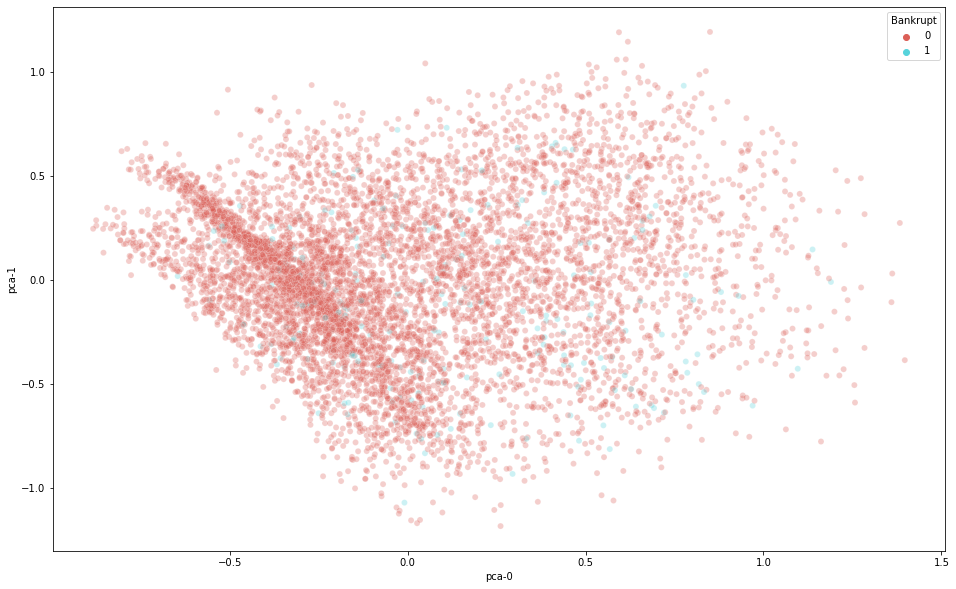

In [40]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="Bankrupt",
    palette=sns.color_palette("hls", 2),
    data=bank,
    legend="full",
    alpha=0.3
)

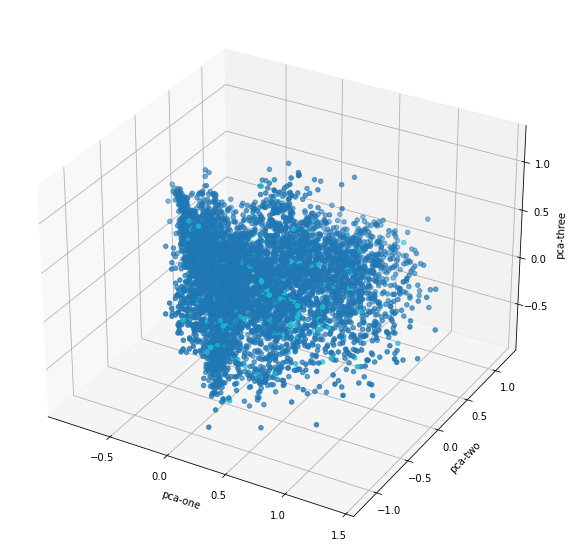

In [41]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=bank.loc[rndperm,:]["pca-0"], 
    ys=bank.loc[rndperm,:]["pca-1"], 
    zs=bank.loc[rndperm,:]["pca-2"], 
    c=bank.loc[rndperm,:]["Bankrupt"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [27]:
from sklearn.cluster import KMeans
clusters = list(range(2,30,1))

C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=2, The Silhouette Coefficient is 0.16880179490102798
For n_clusters=2, The homogeneity_score is 0.00494649056044095


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=3, The Silhouette Coefficient is 0.1301503899591655
For n_clusters=3, The homogeneity_score is 0.009185658855012024


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=4, The Silhouette Coefficient is 0.13582015959064847
For n_clusters=4, The homogeneity_score is 0.019532713874408435


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=5, The Silhouette Coefficient is 0.14076835428096615
For n_clusters=5, The homogeneity_score is 0.01437208973926177


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=6, The Silhouette Coefficient is 0.14262003896837677
For n_clusters=6, The homogeneity_score is 0.016530283407615087


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=7, The Silhouette Coefficient is 0.1393434537789275
For n_clusters=7, The homogeneity_score is 0.01823143930663213


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=8, The Silhouette Coefficient is 0.13306434995573815
For n_clusters=8, The homogeneity_score is 0.020084974406590766


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=9, The Silhouette Coefficient is 0.1298477553282446
For n_clusters=9, The homogeneity_score is 0.01784042570842641


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=10, The Silhouette Coefficient is 0.13442102240459558
For n_clusters=10, The homogeneity_score is 0.01981707462085787


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=11, The Silhouette Coefficient is 0.13310737014726817
For n_clusters=11, The homogeneity_score is 0.019166826265382936


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=12, The Silhouette Coefficient is 0.12858809428316512
For n_clusters=12, The homogeneity_score is 0.020899169723647918


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=13, The Silhouette Coefficient is 0.13062937611335096
For n_clusters=13, The homogeneity_score is 0.019774800964161093


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=14, The Silhouette Coefficient is 0.12914422821849372
For n_clusters=14, The homogeneity_score is 0.022537667965793533


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=15, The Silhouette Coefficient is 0.1312587628119726
For n_clusters=15, The homogeneity_score is 0.02174732811005857


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=16, The Silhouette Coefficient is 0.13735977624478585
For n_clusters=16, The homogeneity_score is 0.022785728903367462


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=17, The Silhouette Coefficient is 0.13736273620536132
For n_clusters=17, The homogeneity_score is 0.03359870605223106


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=18, The Silhouette Coefficient is 0.1406542886798851
For n_clusters=18, The homogeneity_score is 0.037108811708579464


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=19, The Silhouette Coefficient is 0.12886446522696857
For n_clusters=19, The homogeneity_score is 0.04640859822394722


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=20, The Silhouette Coefficient is 0.1288703458746762
For n_clusters=20, The homogeneity_score is 0.0488813730982509


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=21, The Silhouette Coefficient is 0.1312412155765958
For n_clusters=21, The homogeneity_score is 0.046921979535057834


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=22, The Silhouette Coefficient is 0.13188589012251972
For n_clusters=22, The homogeneity_score is 0.048471454237104035


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=23, The Silhouette Coefficient is 0.13303111135073295
For n_clusters=23, The homogeneity_score is 0.03747294023952893


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=24, The Silhouette Coefficient is 0.13503835072540032
For n_clusters=24, The homogeneity_score is 0.04745581075475464


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=25, The Silhouette Coefficient is 0.13232650426446563
For n_clusters=25, The homogeneity_score is 0.04679630365803594


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=26, The Silhouette Coefficient is 0.1345873098916933
For n_clusters=26, The homogeneity_score is 0.043990387933655326


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=27, The Silhouette Coefficient is 0.1362579111926464
For n_clusters=27, The homogeneity_score is 0.04710058170413939


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=28, The Silhouette Coefficient is 0.14093335154119346
For n_clusters=28, The homogeneity_score is 0.03738541596484802


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=29, The Silhouette Coefficient is 0.1407104286957826
For n_clusters=29, The homogeneity_score is 0.04987602608584572


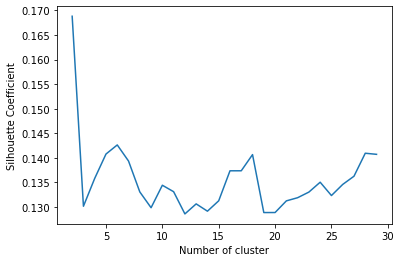

Wall time: 1min 10s


In [28]:
%%time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh = {}
homog = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(bank_pca_27)
    label = kmeans.labels_
    sil_coeff = silhouette_score(bank_pca_27, label, metric='euclidean')
    homog_score = homogeneity_score(bankY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

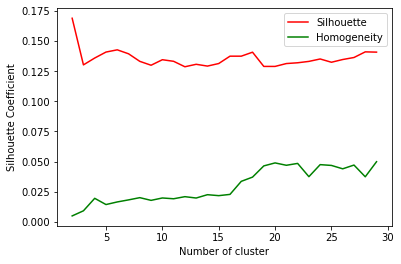

In [29]:
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

For n_clusters=2, The Silhouette Coefficient is 0.07389171847764461
For n_clusters=2, The homogeneity_score is 0.038155184053728246
For n_clusters=2, The log_likelihood score is 221.27080326873622
For n_clusters=3, The Silhouette Coefficient is 0.09612588894013546
For n_clusters=3, The homogeneity_score is 0.04791779074069038
For n_clusters=3, The log_likelihood score is 237.75262444915626
For n_clusters=4, The Silhouette Coefficient is 0.06264868396635573
For n_clusters=4, The homogeneity_score is 0.05546933340732237
For n_clusters=4, The log_likelihood score is 250.77577564342036
For n_clusters=5, The Silhouette Coefficient is 0.044107376552207284
For n_clusters=5, The homogeneity_score is 0.06658098772958686
For n_clusters=5, The log_likelihood score is 252.91229190076578
For n_clusters=6, The Silhouette Coefficient is 0.04908023480545698
For n_clusters=6, The homogeneity_score is 0.04963206117834864
For n_clusters=6, The log_likelihood score is 257.5727696709294
For n_clusters=7, T

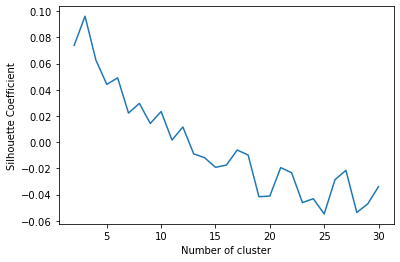

In [15]:
from sklearn.mixture import GaussianMixture
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(bank_pca_27)
    label = gmm.predict(bank_pca_72)
    sil_coeff = silhouette_score(bank_pca_72, label, metric='euclidean')
    homog_score = homogeneity_score(bankY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(bank_pca_72)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [62]:
%%time
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(bank_pca_27, bankY)

Wall time: 7.58 s


MLPClassifier()

In [63]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
bank_train_predictions = neural_net.predict(bank_pca_27)
accuracy = accuracy_score(bankY, bank_train_predictions)
print(accuracy)
print(classification_report(bankY, bank_train_predictions))

0.9796157794398006
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6599
           1       0.83      0.46      0.59       220

    accuracy                           0.98      6819
   macro avg       0.91      0.73      0.79      6819
weighted avg       0.98      0.98      0.98      6819



In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, bank_pca_27, bankY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.95307918, 0.96425487, 0.95215487, 0.92924773, 0.96290202,
        0.96038432, 0.96420349, 0.95056672, 0.95587314, 0.96753979]),
 0.9560206121846566)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_pca_27, 
                                                    bankY, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=bankY)

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

Wall time: 10min 4s


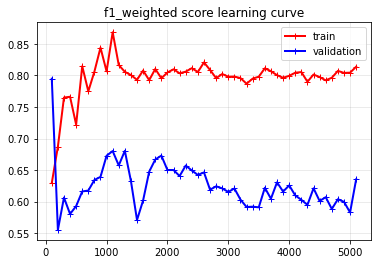

In [67]:
%%time
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, neural_net, f1_score, 
                      average="macro")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [78]:
%%time
best_net = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Wall time: 0 ns


Wall time: 9min 52s


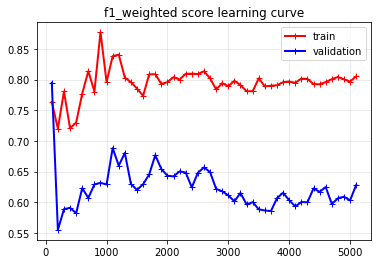

In [82]:
%%time
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, 
                      f1_score, average="macro")

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_macro score learning curve")

In [83]:
from sklearn.metrics import confusion_matrix
best_net.fit(X_train, y_train)
test_predictions = best_net.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0    0.97562   0.99455   0.98499      1650
           1    0.60870   0.25455   0.35897        55

    accuracy                        0.97067      1705
   macro avg    0.79216   0.62455   0.67198      1705
weighted avg    0.96379   0.97067   0.96480      1705

[[1641    9]
 [  41   14]]


In [ ]:
from sklearn.model_selection import validation_curve
params = [10,20,30,40,50]
param_range = [(10,10), (20,20), (30,30), (40,40), (50,50)]

train_scores, test_scores = validation_curve(
    best_net, X_train, y_train, param_name="hidden_layer_sizes", 
    param_range=param_range, scoring='f1_macro', verbose=1, cv=5, n_jobs=-1
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), params, 
                title='f1_weighted on 2-layer hidden_layer complexity curve', inverse_x=True)

HR DATASET


In [24]:
HR = pd.read_csv("~//Documents//Assignment3//HR_data.csv")
HR_orig = pd.read_csv("~//Documents//Assignment3//HR_data.csv")

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

HR['city']=HR['city'].astype(str)
HR['gender']=HR['gender'].astype(str)
HR['relevent_experience']=HR['relevent_experience'].astype(str)
HR['enrolled_university']=HR['enrolled_university'].astype(str)
HR['education_level']=HR['education_level'].astype(str)
HR['major_discipline']=HR['major_discipline'].astype(str)
HR['experience']=HR['experience'].astype(str)
HR['company_size']=HR['company_size'].astype(str)
HR['company_type']=HR['company_type'].astype(str)
HR['last_new_job']=HR['last_new_job'].astype(str)
HR = MultiColumnLabelEncoder(columns = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']).fit_transform(HR)


In [25]:
hrX = HR.drop("target", 1).copy().values
hrY = HR["target"].copy().values
hr_x_df = HR.drop("target",1)
min_max_scaler = preprocessing.MinMaxScaler()
hrX = min_max_scaler.fit_transform(hrX)
hrX_df = pd.DataFrame(hrX, columns=hr_x_df.columns)

In [26]:
dims_hr = list(range(1,14,1))

In [27]:
for dim in dims_hr:
    pca = PCA(n_components=dim)
    pca.fit_transform(hrX_df.values)
    
    # reconstruction
    x_prime = pca.fit_transform(hrX_df.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(hrX_df.values, reconstructed)    
    
    print(dim, ": ", sum(pca.explained_variance_ratio_), rc_err)

1 :  0.24742559076982615 0.37739871002047176
2 :  0.36752431921061535 0.36609639665502436
3 :  0.4588126648901997 0.35750538571861334
4 :  0.5429829898088535 0.3495842411681846
5 :  0.621374855230251 0.3422068988782409
6 :  0.6949087198346647 0.3352867358463634
7 :  0.7646270205447319 0.3287256498784945
8 :  0.8298628712933893 0.3225864006341825
9 :  0.8753659685421009 0.31830417158080093
10 :  0.9157933517222866 0.3144996104569691
11 :  0.9516134590034832 0.31112863324070567
12 :  0.9778738402316607 0.308657307677228
13 :  1.0 0.3065750475690527


In [28]:
pca = PCA(n_components=8)
pca_result = pca.fit_transform(hrX_df.values)
for i in range(8):
    field_name = "pca-"+str(i)
    hrX_df[field_name] = pca_result[:,i]
    HR[field_name] = pca_result[:,i]
HR_pca_8 = pca_result
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.24742559 0.12009873 0.09128834 0.08417032 0.07839187 0.07353386
 0.0697183  0.06523585]


In [29]:
HR_pca_8.shape

(19158, 8)

In [30]:
rndperm = np.random.permutation(HR.shape[0])


<AxesSubplot:xlabel='pca-0', ylabel='pca-1'>

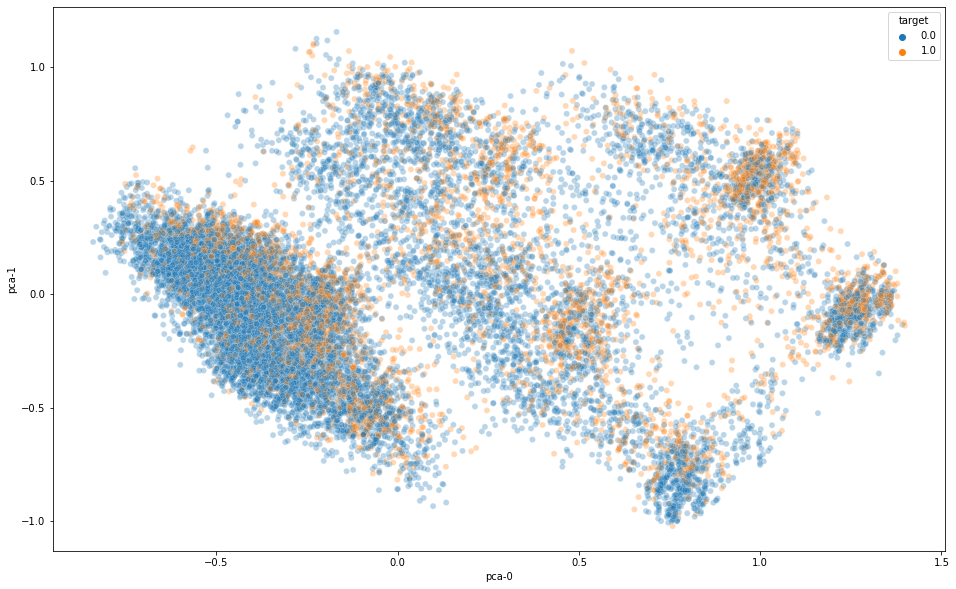

In [31]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="target",
    palette=sns.color_palette("tab10", 2),
    data=HR,
    legend="full",
    alpha=0.3
)


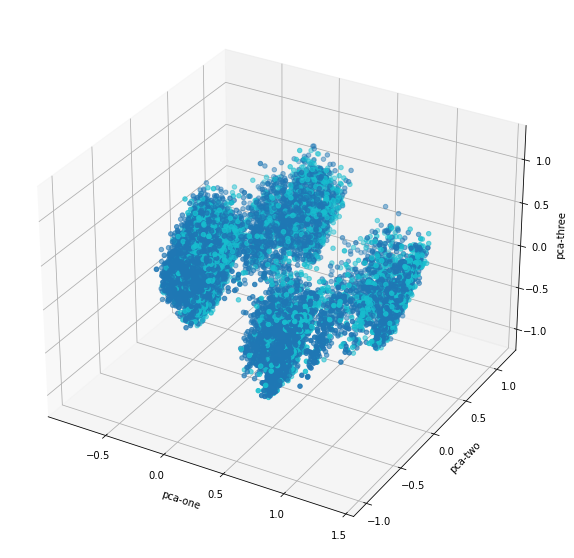

In [32]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=HR.loc[rndperm,:]["pca-0"], 
    ys=HR.loc[rndperm,:]["pca-1"], 
    zs=HR.loc[rndperm,:]["pca-2"], 
    c=HR.loc[rndperm,:]["target"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=2, The Silhouette Coefficient is 0.28828594957265147
For n_clusters=2, The homogeneity_score is 0.01440938648596226


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=3, The Silhouette Coefficient is 0.21644655066340912
For n_clusters=3, The homogeneity_score is 0.018267427896627983


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=4, The Silhouette Coefficient is 0.23675332844990804
For n_clusters=4, The homogeneity_score is 0.02278589999193633


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=5, The Silhouette Coefficient is 0.17884000349436657
For n_clusters=5, The homogeneity_score is 0.023066184382193624


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=6, The Silhouette Coefficient is 0.16933695109441055
For n_clusters=6, The homogeneity_score is 0.036975340059229915


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=7, The Silhouette Coefficient is 0.16838244288980583
For n_clusters=7, The homogeneity_score is 0.03896200149277052


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=8, The Silhouette Coefficient is 0.17191563899781784
For n_clusters=8, The homogeneity_score is 0.038914867946433875


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=9, The Silhouette Coefficient is 0.1800876357438869
For n_clusters=9, The homogeneity_score is 0.027849397444604757


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=10, The Silhouette Coefficient is 0.17734544723814516
For n_clusters=10, The homogeneity_score is 0.037881575495840876


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=11, The Silhouette Coefficient is 0.17023661818357524
For n_clusters=11, The homogeneity_score is 0.052043190804911196


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=12, The Silhouette Coefficient is 0.1741755445588239
For n_clusters=12, The homogeneity_score is 0.05216593082886755


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=13, The Silhouette Coefficient is 0.1787479368674463
For n_clusters=13, The homogeneity_score is 0.05598427776325877


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=14, The Silhouette Coefficient is 0.179964155076261
For n_clusters=14, The homogeneity_score is 0.0602780501316459


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=15, The Silhouette Coefficient is 0.18081035293115616
For n_clusters=15, The homogeneity_score is 0.06224032865123869


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=16, The Silhouette Coefficient is 0.1802416534403545
For n_clusters=16, The homogeneity_score is 0.0666546672652102


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=17, The Silhouette Coefficient is 0.17758848774133695
For n_clusters=17, The homogeneity_score is 0.06644576079199067


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=18, The Silhouette Coefficient is 0.1801444177221798
For n_clusters=18, The homogeneity_score is 0.061916733272360976


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=19, The Silhouette Coefficient is 0.1838074685340029
For n_clusters=19, The homogeneity_score is 0.06875817661527364


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=20, The Silhouette Coefficient is 0.17978654283400833
For n_clusters=20, The homogeneity_score is 0.05731588103122222


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=21, The Silhouette Coefficient is 0.17568453184163743
For n_clusters=21, The homogeneity_score is 0.06225584054484828


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=22, The Silhouette Coefficient is 0.18005259061168571
For n_clusters=22, The homogeneity_score is 0.06775260332123206


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=23, The Silhouette Coefficient is 0.1780085458364147
For n_clusters=23, The homogeneity_score is 0.06837465200068939


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=24, The Silhouette Coefficient is 0.18071660795623254
For n_clusters=24, The homogeneity_score is 0.06359082866446841


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=25, The Silhouette Coefficient is 0.18412683450460865
For n_clusters=25, The homogeneity_score is 0.06338618123232309


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=26, The Silhouette Coefficient is 0.18127695136223412
For n_clusters=26, The homogeneity_score is 0.06911206414617199


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=27, The Silhouette Coefficient is 0.18267330018547964
For n_clusters=27, The homogeneity_score is 0.0646855350451022


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=28, The Silhouette Coefficient is 0.1821729308942763
For n_clusters=28, The homogeneity_score is 0.07027581127288211


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=29, The Silhouette Coefficient is 0.18605982833359594
For n_clusters=29, The homogeneity_score is 0.07410344122746927


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=30, The Silhouette Coefficient is 0.18854856721273122
For n_clusters=30, The homogeneity_score is 0.07022740664131989


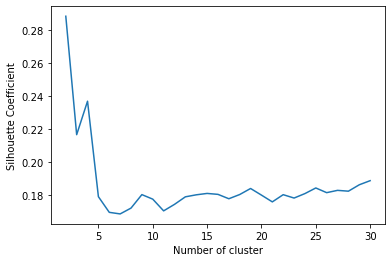

In [33]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh_wine = {}
homog_wine = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(HR_pca_8)
    label = kmeans.labels_
    sil_coeff = silhouette_score(HR_pca_8, label, metric='euclidean')
    homog_score = homogeneity_score(hrY, label)
    silh_wine[cluster] = sil_coeff
    homog_wine[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.2883681439239558
For n_clusters=2, The homogeneity_score is 0.014128623563190841
For n_clusters=2, The log_likelihood score is -0.31258704689506395
For n_clusters=3, The Silhouette Coefficient is 0.21051061864389659
For n_clusters=3, The homogeneity_score is 0.01891072533466313
For n_clusters=3, The log_likelihood score is 1.189888788104426
For n_clusters=4, The Silhouette Coefficient is 0.230809531995805
For n_clusters=4, The homogeneity_score is 0.023417939945592513
For n_clusters=4, The log_likelihood score is 1.4587038102220353
For n_clusters=5, The Silhouette Coefficient is 0.1690467423210377
For n_clusters=5, The homogeneity_score is 0.023619586731480822
For n_clusters=5, The log_likelihood score is 1.6891054145376934
For n_clusters=6, The Silhouette Coefficient is 0.1625680682173612
For n_clusters=6, The homogeneity_score is 0.041896935056286416
For n_clusters=6, The log_likelihood score is 2.3656165810897516
For n_clusters=7, Th

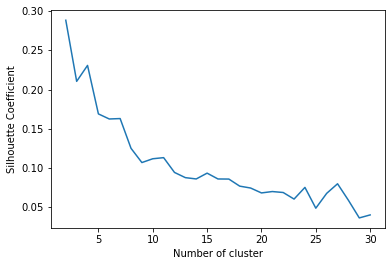

In [34]:

from sklearn.mixture import GaussianMixture
silh_wine_EM = {}
homog__wine_EM = {}
log_likelihood_wine_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(HR_pca_8)
    label = gmm.predict(HR_pca_8)
    sil_coeff = silhouette_score(HR_pca_8, label, metric='euclidean')
    homog_score = homogeneity_score(hrY, label)
    silh_wine_EM[cluster] = sil_coeff
    homog__wine_EM[cluster] = homog_score
    log_likelihood_wine_EM[cluster] = gmm.score(HR_pca_8)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_wine_EM[cluster]))
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [35]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(HR_pca_8, hrY)

MLPClassifier()

In [36]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
hr_train_predictions = neural_net.predict(HR_pca_8)
accuracy = accuracy_score(hrY, hr_train_predictions)
print(accuracy)
print(classification_report(hrY, hr_train_predictions))

0.7758116713644431
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86     14381
         1.0       0.61      0.27      0.38      4777

    accuracy                           0.78     19158
   macro avg       0.70      0.61      0.62     19158
weighted avg       0.75      0.78      0.74     19158



In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, HR_pca_8, hrY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.74219086, 0.76292337, 0.73365844, 0.74549451, 0.73495995,
        0.73988245, 0.74857291, 0.74492503, 0.73010659, 0.73990336]),
 0.742261747182677)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(HR_pca_8, 
                                                    hrY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=hrY)

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

Wall time: 52min 26s


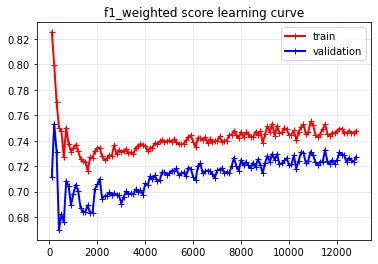

In [40]:
%%time
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, neural_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [42]:
import sklearn
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
import mlrose_hiive
from sklearn.metrics import f1_score
from functools import partial
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict, Counter
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import sys
from sklearn.metrics import accuracy_score, homogeneity_score
from sklearn import preprocessing

np.random.seed(88)

In [43]:
HR = pd.read_csv("~//Documents//Assignment3//HR_data.csv")
HR_orig = pd.read_csv("~//Documents//Assignment3//HR_data.csv")

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

HR['city']=HR['city'].astype(str)
HR['gender']=HR['gender'].astype(str)
HR['relevent_experience']=HR['relevent_experience'].astype(str)
HR['enrolled_university']=HR['enrolled_university'].astype(str)
HR['education_level']=HR['education_level'].astype(str)
HR['major_discipline']=HR['major_discipline'].astype(str)
HR['experience']=HR['experience'].astype(str)
HR['company_size']=HR['company_size'].astype(str)
HR['company_type']=HR['company_type'].astype(str)
HR['last_new_job']=HR['last_new_job'].astype(str)
HR = MultiColumnLabelEncoder(columns = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']).fit_transform(HR)


In [44]:
hrX = HR.drop("target", 1).copy().values
hrY = HR["target"].copy().values
hr_x_df = HR.drop("target",1)
min_max_scaler = preprocessing.MinMaxScaler()
hrX = min_max_scaler.fit_transform(hrX)
hrX_df = pd.DataFrame(hrX, columns=hr_x_df.columns)

In [47]:
dims_hr = list(range(4,13,1))

In [48]:
for dim in dims_hr:
    pca = PCA(n_components=dim, random_state=44)
    pca.fit_transform(bankX_df.values)
    
    # reconstruction
    x_prime = pca.fit_transform(bankX_df.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(bankX_df.values, reconstructed)    
        
    print(dim, ": ", sum(pca.explained_variance_ratio_), rc_err)

4 :  0.5181228304815393 0.1547195006691223
5 :  0.6056516302883265 0.15327782679066793
6 :  0.6844701772918125 0.15197961819414357
7 :  0.7499356367563943 0.15090134632180632
8 :  0.8005078344069667 0.15006837915568724
9 :  0.8492259298277891 0.14926595063237533
10 :  0.886201715258247 0.14865692795517538
11 :  0.9090968577289676 0.148279825459581
12 :  0.9271653305723913 0.14798222232347683


In [49]:
comp = 10
pca = PCA(n_components=comp, random_state=88)
pca_result = pca.fit_transform(hrX_df.values)
for i in range(comp):
    field_name = "pca-"+str(i)
    hrX_df[field_name] = pca_result[:,i]
    HR[field_name] = pca_result[:,i]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sum(pca.explained_variance_ratio_)
HR_pca_10 = pca_result

Explained variation per principal component: [0.24742559 0.12009873 0.09128834 0.08417032 0.07839187 0.07353386
 0.0697183  0.06523585 0.0455031  0.04042738]


In [ ]:
rndperm = np.random.permutation(HR.shape[0])


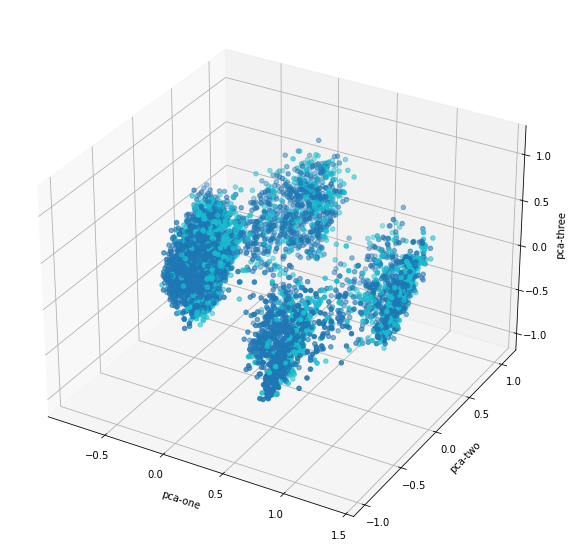

In [50]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=HR.loc[rndperm,:]["pca-0"], 
    ys=HR.loc[rndperm,:]["pca-1"], 
    zs=HR.loc[rndperm,:]["pca-2"], 
    c=HR.loc[rndperm,:]["target"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()